- **민규사원님 feedback**
    - re
    - image(?).replace
    - dataset 상속 받아서 class 선언(getitem, len, init)

검색결과 :   
https://www.google.com/search?q=pytorch+annotations+class+kaggle&sxsrf=ALiCzsaJswQtYo7rEvpAKimREGU6HnoLgQ%3A1666856506771&ei=OjZaY77YLs_a-QbTgbqoBw&ved=0ahUKEwi-3eiv9P_6AhVPbd4KHdOADnUQ4dUDCA8&uact=5&oq=pytorch+annotations+class+kaggle&gs_lcp=Cgxnd3Mtd2l6LXNlcnAQAzIFCAAQogQyBQgAEKIEMgUIABCiBDIFCAAQogQyBQgAEKIEOggIABCiBBCwA0oECEEYAUoECEYYAFCJIli0NmC8N2gCcAB4AIABgQGIAYcNkgEEMC4xNZgBAKABAcgBBcABAQ&sclient=gws-wiz-serp   

여기 케글에서 __init__안에 for문 잘돌려놓음. 내일도 보면서 하자.

In [92]:
data_path = "/home/sldev1/Project/hyeongeun_test/data/FER/"
EMOTIONS = ["Neutral", "happiness", "Sadness", "Suprise", "Fear", "Disgust", "Anger", "Content"]

In [93]:
import numpy as np

npy1 = np.load(data_path+"val_set/annotations/5495_val.npy")
npy2 = np.load(data_path+"val_set/annotations/5495_lnd.npy")

print(npy1,"\n\n", npy2)

-0.667828 

 [ 12.23340206  74.31278272  14.54556701 101.40055909  18.64742268
 128.60503177  24.22721649 154.03344346  35.26845361 175.45148666
  50.8185567  193.93789072  70.93525773 209.16249047  92.52701031
 219.32645489 116.27216495 222.85865311 136.76989691 219.14714104
 155.91092784 208.24315121 172.96206186 192.63715375 186.30969072
 174.13936468 195.1542268  151.1615756  199.52164948 126.80050826
 203.33484536 101.67949174 205.34969072  76.3364676   33.64907216
  76.38770013  48.06185567  66.5652859   66.74103093  63.15263024
  85.52123711  65.71994917 103.10061856  71.07090216 130.49154639
  70.52726811 146.4457732   63.14409149 164.31958763  60.36330368
 182.58020619  61.23994917 197.71463918  70.37641677 117.23917526
  86.09911055 118.11670103 103.18515883 118.74309278 120.66683609
 119.16453608 138.00335451  97.13690722 144.56681067 107.78556701
 147.91115629 117.83670103 151.18434562 127.28453608 147.54398983
 136.05979381 143.55923761  52.11463918  87.4425413   64.541443

In [126]:
import os

test_img_ = len(os.listdir(data_path+"val_set/images/"))
test_ano_ = len(os.listdir(data_path+"val_set/annotations/"))
train_img_ = len(os.listdir(data_path+"train_set/images/"))
train_ano_ = len(os.listdir(data_path+"train_set/annotations/"))


print(f"Test Dataset_Image 개수 : {test_img_}")
print(f"Test Dataset_Annotation 개수 : {test_ano_}")
print("**************\n\n***************")
print(f"Train Dataset_Image 개수 : {train_img_}")
print(f"Train Dataset_Annotation 개수 : {train_ano_}")

Test Dataset_Image 개수 : 3999
Test Dataset_Annotation 개수 : 15996
**************

***************
Train Dataset_Image 개수 : 287651
Train Dataset_Annotation 개수 : 1150604


In [95]:
#https://yunwoong.tistory.com/41
### jpg 파일 list로 감싸기
file_list = os.listdir(data_path+"train_set/images/")
jpg_file_list = [file for file in file_list if file.endswith(".jpg")] #현재 해당 폴더 안에 .jpg밖에 없어서 하나마나임.
print(len(jpg_file_list))

### npy 파일 list로 감싸기
file_list2 = os.listdir(data_path+"train_set/annotations/")
npy_file_list = [file for file in file_list2 if file.endswith(".npy")]#현재 해당 폴더 안에 .npy밖에 없어서 하나마나임.
print(len(npy_file_list))

287651
1150604


In [113]:
from PIL import Image

img = Image.open(data_path+"train_set/images/0.jpg")
print(img)
print(type(img))

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=224x224 at 0x7FA6981F7400>
<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [134]:
!pip3 install scikit-image

     |████████████████████████████████| 12.4 MB 9.4 MB/s            
     |████████████████████████████████| 1.6 MB 109.4 MB/s            
     |████████████████████████████████| 4.4 MB 18.3 MB/s            
     |████████████████████████████████| 148 kB 35.7 MB/s            
  Attempting uninstall: decorator
    Found existing installation: decorator 5.1.1
    Uninstalling decorator-5.1.1:
      Successfully uninstalled decorator-5.1.1


In [139]:
from skimage import io

io.imread(data_path+"train_set/images/0.jpg")
io.imread(data_path+"train_set/annotations/0_exp.npy")



#image = io.imread(os.path.join(data_path+"train_set/images/0.jpg", data_path+"train_set/annotations/0_exp.npy")



ValueError: Could not find a backend to open `/home/sldev1/Project/hyeongeun_test/data/FER/train_set/annotations/0_exp.npy`` with iomode `ri`.

In [105]:
from torch.utils.data import Dataset

class MyFER_Dataset(Dataset):
    
    def __init__(self, img_path, label_path, train=True, transform):
        self.img = img_path
        self.label = label_path
        self.transform = transform
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = os.path.join(self.img,
                                self.label)
        
        
        
        
        
        return 
    

    def __len__:
        return len(self.img)

SyntaxError: unexpected EOF while parsing (<ipython-input-105-3fbbac522d91>, line 3)

In [ ]:
from PIL import Image
A = io.imread('/home/sldev1/Project/hyeongeun_test/data/FER/train_set/images/0.jpg')
A.shape # H, W, C

(224, 224, 3)

# 디렉토리 안에 img를 numpy 배열로 로드하는 방법
https://thinking-developer.tistory.com/62   
감사합니다 ㅠㅠㅠ진짜

### 10.31(월)
img, annotation 두 가지 list를 sort해서   
list[0] 이렇게 인덱싱 했을 때 같이 나오도록 세팅하는 방법 공부중.

In [30]:
import os
import numpy as np
from PIL import Image

image_path = '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/images/'

img_list = os.listdir(image_path) #디렉토리 내 모든 파일 불러오기
img_list.sort()
img_list_jpg = [img for img in img_list if img.endswith(".jpg")] #지정된 확장자만 필터링

print ("img_list_jpg: {}".format(img_list_jpg))

img_list_jpg: ['0.jpg', '1.jpg', '10.jpg', '100.jpg', '1001.jpg', '1002.jpg', '1003.jpg', '1007.jpg', '1008.jpg', '1009.jpg', '101.jpg', '1010.jpg', '1011.jpg', '1012.jpg', '1013.jpg', '1014.jpg', '1016.jpg', '1017.jpg', '1018.jpg', '1019.jpg', '102.jpg', '1020.jpg', '1021.jpg', '1022.jpg', '1023.jpg', '1024.jpg', '1025.jpg', '1026.jpg', '1028.jpg', '1029.jpg', '103.jpg', '1030.jpg', '1031.jpg', '1032.jpg', '1033.jpg', '1034.jpg', '1036.jpg', '1037.jpg', '1038.jpg', '1039.jpg', '104.jpg', '1040.jpg', '1041.jpg', '1043.jpg', '1045.jpg', '1046.jpg', '1048.jpg', '1049.jpg', '105.jpg', '1050.jpg', '1051.jpg', '1052.jpg', '1053.jpg', '1056.jpg', '1057.jpg', '1058.jpg', '1059.jpg', '1060.jpg', '1061.jpg', '1062.jpg', '1063.jpg', '1064.jpg', '1066.jpg', '1067.jpg', '1068.jpg', '1069.jpg', '107.jpg', '1071.jpg', '1073.jpg', '1074.jpg', '1076.jpg', '1077.jpg', '1078.jpg', '1081.jpg', '1083.jpg', '1084.jpg', '1085.jpg', '1086.jpg', '1087.jpg', '1088.jpg', '1089.jpg', '109.jpg', '1090.jpg', '1091

In [2]:
img_list_np = []

for i in img_list_jpg:
    img = Image.open(image_path + i)
    img_array = np.array(img)
    img_list_np.append(img_array)
    print(i, " 추가 완료 - 구조:", img_array.shape) # 불러온 이미지의 차원 확인 (세로X가로X색)
    #print(img_array.T.shape) #축변경 (색X가로X세로)

1679.jpg  추가 완료 - 구조: (224, 224, 3)
1815.jpg  추가 완료 - 구조: (224, 224, 3)
3633.jpg  추가 완료 - 구조: (224, 224, 3)
2117.jpg  추가 완료 - 구조: (224, 224, 3)
189.jpg  추가 완료 - 구조: (224, 224, 3)
4874.jpg  추가 완료 - 구조: (224, 224, 3)
3242.jpg  추가 완료 - 구조: (224, 224, 3)
1441.jpg  추가 완료 - 구조: (224, 224, 3)
1025.jpg  추가 완료 - 구조: (224, 224, 3)
5209.jpg  추가 완료 - 구조: (224, 224, 3)
4138.jpg  추가 완료 - 구조: (224, 224, 3)
3249.jpg  추가 완료 - 구조: (224, 224, 3)
917.jpg  추가 완료 - 구조: (224, 224, 3)
1310.jpg  추가 완료 - 구조: (224, 224, 3)
3265.jpg  추가 완료 - 구조: (224, 224, 3)
1547.jpg  추가 완료 - 구조: (224, 224, 3)
2705.jpg  추가 완료 - 구조: (224, 224, 3)
1553.jpg  추가 완료 - 구조: (224, 224, 3)
4757.jpg  추가 완료 - 구조: (224, 224, 3)
2869.jpg  추가 완료 - 구조: (224, 224, 3)
4503.jpg  추가 완료 - 구조: (224, 224, 3)
3.jpg  추가 완료 - 구조: (224, 224, 3)
3362.jpg  추가 완료 - 구조: (224, 224, 3)
4286.jpg  추가 완료 - 구조: (224, 224, 3)
1744.jpg  추가 완료 - 구조: (224, 224, 3)
3745.jpg  추가 완료 - 구조: (224, 224, 3)
3681.jpg  추가 완료 - 구조: (224, 224, 3)
2544.jpg  추가 완료 - 구조: (224, 224, 

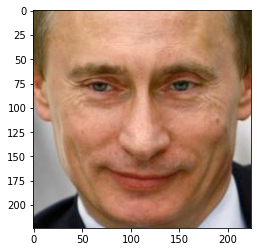

In [27]:
#시각화
from matplotlib import pyplot as plt
plt.imshow(img_list_np[1])

In [15]:
img_np = np.array(img_list_np) #리스트를 numpy로 변환
print(type(img_np))
print(img_np.shape)

<class 'numpy.ndarray'>
(3999, 224, 224, 3)


### npy를 numpy 배열로 로드하는 중
위에꺼 보고 똑같이

In [36]:
annotation_path = '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/'

annotation_list = os.listdir(annotation_path) #디렉토리 내 모든 파일 불러오기
annotation_list.sort()
print(annotation_list)
annotation_list_npy = [ann for ann in annotation_list if ann.endswith("_exp.npy")]
#print(sorted(annotation_list_npy))
#print("annotation_list_npy: {}".format(annotation_list_npy))

['0_aro.npy', '0_exp.npy', '0_lnd.npy', '0_val.npy', '1001_aro.npy', '1001_exp.npy', '1001_lnd.npy', '1001_val.npy', '1002_aro.npy', '1002_exp.npy', '1002_lnd.npy', '1002_val.npy', '1003_aro.npy', '1003_exp.npy', '1003_lnd.npy', '1003_val.npy', '1007_aro.npy', '1007_exp.npy', '1007_lnd.npy', '1007_val.npy', '1008_aro.npy', '1008_exp.npy', '1008_lnd.npy', '1008_val.npy', '1009_aro.npy', '1009_exp.npy', '1009_lnd.npy', '1009_val.npy', '100_aro.npy', '100_exp.npy', '100_lnd.npy', '100_val.npy', '1010_aro.npy', '1010_exp.npy', '1010_lnd.npy', '1010_val.npy', '1011_aro.npy', '1011_exp.npy', '1011_lnd.npy', '1011_val.npy', '1012_aro.npy', '1012_exp.npy', '1012_lnd.npy', '1012_val.npy', '1013_aro.npy', '1013_exp.npy', '1013_lnd.npy', '1013_val.npy', '1014_aro.npy', '1014_exp.npy', '1014_lnd.npy', '1014_val.npy', '1016_aro.npy', '1016_exp.npy', '1016_lnd.npy', '1016_val.npy', '1017_aro.npy', '1017_exp.npy', '1017_lnd.npy', '1017_val.npy', '1018_aro.npy', '1018_exp.npy', '1018_lnd.npy', '1018_v

In [20]:
ann_list_np = []

for i in annotation_list_npy:
    ann = np.load(annotation_path+i)
    ann_array = np.array(ann)
    ann_list_np.append(ann_array)
    print(i, " 추가 완료 - 구조:", ann_array.shape)


317_exp.npy  추가 완료 - 구조: ()
549_exp.npy  추가 완료 - 구조: ()
1017_exp.npy  추가 완료 - 구조: ()
5247_exp.npy  추가 완료 - 구조: ()
466_exp.npy  추가 완료 - 구조: ()
1687_exp.npy  추가 완료 - 구조: ()
885_exp.npy  추가 완료 - 구조: ()
886_exp.npy  추가 완료 - 구조: ()
5200_exp.npy  추가 완료 - 구조: ()
3120_exp.npy  추가 완료 - 구조: ()
2807_exp.npy  추가 완료 - 구조: ()
1073_exp.npy  추가 완료 - 구조: ()
4092_exp.npy  추가 완료 - 구조: ()
2256_exp.npy  추가 완료 - 구조: ()
4907_exp.npy  추가 완료 - 구조: ()
569_exp.npy  추가 완료 - 구조: ()
104_exp.npy  추가 완료 - 구조: ()
4020_exp.npy  추가 완료 - 구조: ()
2288_exp.npy  추가 완료 - 구조: ()
5308_exp.npy  추가 완료 - 구조: ()
4200_exp.npy  추가 완료 - 구조: ()
3891_exp.npy  추가 완료 - 구조: ()
5457_exp.npy  추가 완료 - 구조: ()
713_exp.npy  추가 완료 - 구조: ()
3082_exp.npy  추가 완료 - 구조: ()
1666_exp.npy  추가 완료 - 구조: ()
3389_exp.npy  추가 완료 - 구조: ()
4729_exp.npy  추가 완료 - 구조: ()
1606_exp.npy  추가 완료 - 구조: ()
4930_exp.npy  추가 완료 - 구조: ()
4983_exp.npy  추가 완료 - 구조: ()
5364_exp.npy  추가 완료 - 구조: ()
5284_exp.npy  추가 완료 - 구조: ()
2785_exp.npy  추가 완료 - 구조: ()
237_exp.npy  추가 완료 - 구

In [28]:
ann_np = np.array(ann_list_np) #리스트를 numpy로 변환
print(type(ann_np))
print(ann_np.shape)
print(ann_np[1])

<class 'numpy.ndarray'>
(3999,)
6


# 디렉토리 안에 npy파일들만 glob

In [4]:
import glob

exp = glob.glob('/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/*exp.np[yz]')
exp

['/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/317_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/549_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/1017_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/5247_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/466_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/1687_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/885_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/886_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/5200_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/3120_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/2807_exp.npy',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/1073_exp.npy',
 '/home/sldev1/Projec

In [17]:
numpy_vars = {} #dict
for np_name in glob.glob('/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/*exp.np[yz]'):
    result = np.load(np_name).item()
    numpy_vars[np_name] = result

numpy_vars

{'/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/317_exp.npy': '6',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/549_exp.npy': '6',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/1017_exp.npy': '0',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/5247_exp.npy': '0',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/466_exp.npy': '5',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/1687_exp.npy': '4',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/885_exp.npy': '5',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/886_exp.npy': '6',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/5200_exp.npy': '5',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/3120_exp.npy': '3',
 '/home/sldev1/Project/hyeongeun_test/data/FER/val_set/annotations/2807_exp.npy': '4',
 '/home/sldev1/Project/hyeongeun_test/data/FER/v

In [ ]:
'''
img를 dataset하는건 알겠는데
npy를 dataset하는걸 모르겠음.
그래서 아래 전략을 생각해봄.
1. 다이렉트 npy
    검색해도 안나옴
2. npy -> csv파일 전환
    검색해도 안나옴
'''

In [66]:
train_img_list = make_file_list()
print(train_img_list[-1])

/home/sldev1/Project/hyeongeun_test/data/FER/val_set/images/3998.jpg


In [ ]:
'''
#############################################일단보류
class Img_Dataset(data.Dataset):

    def __init__(self, file_list, transform):
        self.file_list = file_list
        self.transform = transform

    def __len__(self):
        return len(self.file_list)

    def __getitem__(self, index):
        img_path = self.file_list[index]
        img = Image.open(img_path)
        img_transformed = self.transform(img)

        return img_transformed
#############################################일단보류
'''

In [91]:
label = np.load(data_path+"train_set/annotations/"+npy_file_list[1])
label

array('0.809524', dtype='<U8')

In [1]:
from torch.utils.data import Dataset
import numpy as np

#일단 FER중에 감정(_exp.npy) 먼저 해보자
#val_set을 test 데이터로 일단 쓴다.
class zorang2Dataset(Dataset):
    
    def __init__(self, data_path, train=True, transform=None):
        
        if train:
            self.label_dir = data_path+"train_set/annotations/"
            self.img_dir = data_path+"train_set/images/"
        else:
            self.label_dir = data_path+"val_set/annotations/"
            self.img_dir = data_path+"val_set/images/"
        
        self.transform = transform
        
        
        
        self.label = np.load(label_dir)
        self.img = img_dir
        self.transform = transform
            
    def __getitem__(self):
        
        io.read_image(sys.path[-1]+'FER/val_set/images/5495.jpg')
        
        
        return
    def __len__(self):
        return len(self.label_dir)

In [70]:
from pathlib import Path
dir_ = Path('/home/sldev1/Project/hyeongeun_test/data/FER/train_set/')
filepaths = list(dir_.glob(r'**/*.jpg'))

In [79]:
len(filepaths)

287651

# Visualizing the Dataset
### 위에 정수 값 별 의미
0 : Neutral   
1 : Happiness   
2 : Sadness   
3 : Suprise   
4 : Fear   
5 : Disgust   
6 : Anger   
7 : Content   

In [ ]:
#https://pytorch.org/tutorials/beginner/basics/data_tutorial.html
label_map = {
    0 : Neutral
    1 : Happiness
    2 : Sadness
    3 : Suprise
    4 : Fear
    5 : Disgust
    6 : Anger
    7 : Content
}

2


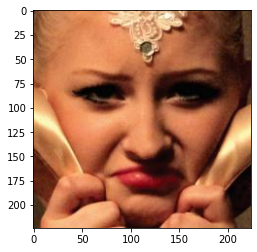

In [11]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

exp1 = np.load(sys.path[-1]+'FER/val_set/annotations/5495_exp.npy')
print(exp1)
img1 = Image.open(sys.path[-1]+'FER/val_set/images/5495.jpg')
plt.imshow(img1)
plt.show()

In [36]:
print(exp1.shape, exp1)

() 2


In [75]:
EMOTIONS = ["Neutral", "happiness", "Sadness", "Suprise", "Fear", "Disgust", "Anger", "Content"]

print(EMOTIONS[int(exp1)])

Sadness


In [85]:
from torchvision import io
io.read_image(sys.path[-1]+'FER/val_set/images/5495.jpg')

tensor([[[ 86,  90, 118,  ...,  91,  91,  95],
         [ 85,  89, 114,  ...,  87,  83,  84],
         [ 85,  91, 112,  ...,  86,  84,  85],
         ...,
         [ 66,  68,  63,  ...,  98,  96,  95],
         [ 71,  71,  62,  ...,  95,  97,  99],
         [ 77,  71,  60,  ...,  90,  95, 100]],

        [[ 49,  53,  76,  ...,  64,  63,  67],
         [ 48,  52,  72,  ...,  60,  55,  56],
         [ 48,  54,  70,  ...,  59,  57,  58],
         ...,
         [ 38,  43,  45,  ...,  72,  69,  68],
         [ 44,  46,  44,  ...,  69,  71,  73],
         [ 50,  49,  42,  ...,  64,  69,  74]],

        [[ 23,  27,  51,  ...,  37,  39,  43],
         [ 22,  26,  47,  ...,  33,  31,  32],
         [ 22,  28,  45,  ...,  32,  30,  31],
         ...,
         [ 17,  21,  23,  ...,  49,  48,  47],
         [ 25,  26,  22,  ...,  46,  48,  50],
         [ 31,  28,  22,  ...,  41,  46,  51]]], dtype=torch.uint8)

In [93]:
os.listdir(sys.path[-1]+'FER/val_set/images/')

['1679.jpg',
 '1815.jpg',
 '3633.jpg',
 '2117.jpg',
 '189.jpg',
 '4874.jpg',
 '3242.jpg',
 '1441.jpg',
 '1025.jpg',
 '5209.jpg',
 '4138.jpg',
 '3249.jpg',
 '917.jpg',
 '1310.jpg',
 '3265.jpg',
 '1547.jpg',
 '2705.jpg',
 '1553.jpg',
 '4757.jpg',
 '2869.jpg',
 '4503.jpg',
 '3.jpg',
 '3362.jpg',
 '4286.jpg',
 '1744.jpg',
 '3745.jpg',
 '3681.jpg',
 '2544.jpg',
 '4302.jpg',
 '4317.jpg',
 '4474.jpg',
 '4343.jpg',
 '3877.jpg',
 '2042.jpg',
 '2700.jpg',
 '2493.jpg',
 '5245.jpg',
 '2322.jpg',
 '4527.jpg',
 '4419.jpg',
 '720.jpg',
 '4193.jpg',
 '3307.jpg',
 '595.jpg',
 '1845.jpg',
 '2467.jpg',
 '144.jpg',
 '4529.jpg',
 '3758.jpg',
 '5349.jpg',
 '4728.jpg',
 '2851.jpg',
 '3749.jpg',
 '3581.jpg',
 '4775.jpg',
 '5426.jpg',
 '569.jpg',
 '3529.jpg',
 '3839.jpg',
 '4576.jpg',
 '2517.jpg',
 '4696.jpg',
 '1100.jpg',
 '1789.jpg',
 '1982.jpg',
 '2937.jpg',
 '2946.jpg',
 '4263.jpg',
 '270.jpg',
 '3795.jpg',
 '4625.jpg',
 '3595.jpg',
 '2896.jpg',
 '1008.jpg',
 '3798.jpg',
 '2830.jpg',
 '4602.jpg',
 '232.jpg

In [95]:
!cat sys.path[-1]+'FER/val_set/annotations/5495_exp.npy'

cat: 'sys.path[-1]+FER/val_set/annotations/5495_exp.npy': No such file or directory


In [99]:
exp1.append("test")

AttributeError: 'numpy.ndarray' object has no attribute 'append'